In [1]:
import pydotplus 
import pandas as pd

from sklearn.model_selection import cross_val_score
from IPython.display import Image
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

C:\Users\1\Miniconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = np.genfromtxt("german_data-numeric.csv")
X = data[:, :-1]
y = data[:, -1]

In [4]:
print (X.shape, y.shape)

(1000, 24) (1000,)


In [5]:
print(X[0])

[  1.   6.   4.  12.   5.   5.   3.   4.   1.  67.   3.   2.   1.   2.   1.
   0.   0.   1.   0.   0.   1.   0.   0.   1.]


In [7]:
model = tree.DecisionTreeClassifier(max_depth = 6)
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [9]:
dot_data = tree.export_graphviz(model, out_file="small_tree.out",
                        filled=True,
                        rounded=True,
                        special_characters=True)  

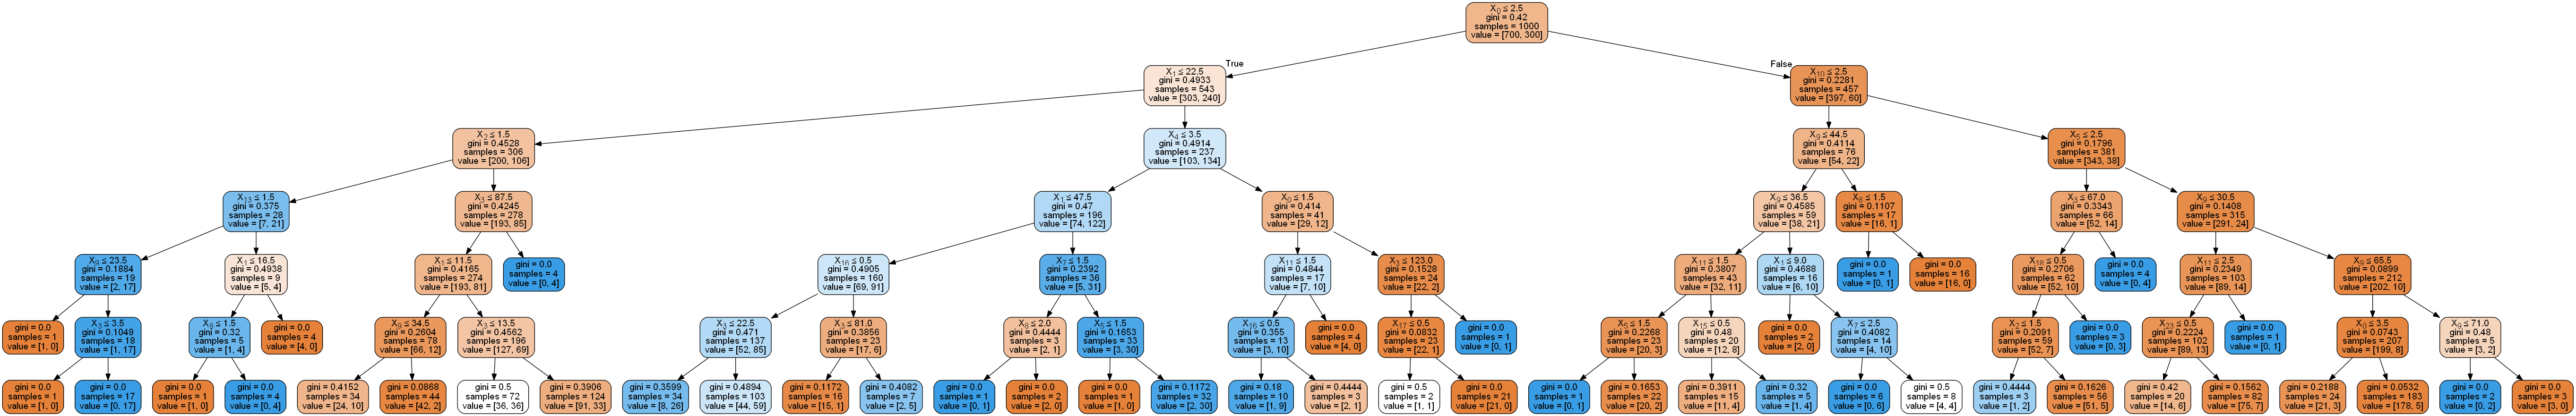

In [10]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())  

In [11]:
crv = np.array([])
ac = np.array([])
for i in range(19):
    crv = np.append(crv, np.mean(cross_val_score(tree.DecisionTreeClassifier(max_depth=(i+1)), X, y)))
    model = tree.DecisionTreeClassifier(max_depth = i+1)
    model.fit(X, y)
    ac = np.append(ac, accuracy_score(y, model.predict(X)))

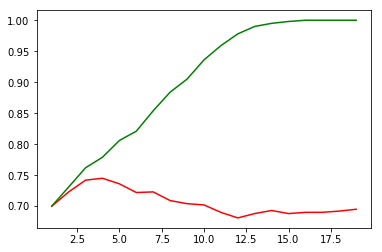

In [14]:
d_values = np.arange(1, 20)
plt.plot(d_values, crv, 'r')
plt.plot(d_values, ac, 'g')
plt.show()